# Data Cleaning Stage 1

Notes: 
 - Raw data is in `../raw_data/soc99.csv`
 - Clean the data and store it in `./clean_data`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read data
df99 = pd.read_csv(r"../raw_data/soc99.csv")
filename = r'../raw_data/soc{yrnum}.xls'
dataname = 'df{yrnum}'
yearnum = np.array(['00', '01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18'])
data = df99
for i in range(0,19):
    df = pd.read_excel(filename.format(yrnum = yearnum[i]))
    df,data = df.align(data, join = 'inner', axis =1)
    data = pd.concat([data,df], axis = 0)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [3]:
# Table with variable names
variables = pd.read_excel("1.2.Variables.xlsx")

In [4]:
dt = data

# Replace Columns name abbreviations with full names

In [5]:
# Creating a dictionary with the variable names and their descriptions
variable_descriptions = {
    name: descr 
    for name, descr 
    in zip(
        list(variables['Variable']),
        list(variables['Description'])
    )
}

In [6]:
# Replacing the variables name (Abbreviations) with their descriptions (Full Names)
dt.columns = [variable_descriptions[c] for c in dt.columns]

In [7]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
CentralAir-conditioning,533609.0,1.075040,0.356037,0.0,1.0,1.0,1.0,2.0
Foundation,533609.0,2.129156,0.961265,0.0,1.0,2.0,3.0,4.0
CategoryCode,533609.0,1.465170,0.805879,1.0,1.0,1.0,2.0,4.0
ClosingCostsinSalesPrice,533609.0,0.543092,0.851574,0.0,0.0,0.0,1.0,2.0
Condominium,533609.0,1.100298,0.974132,0.0,0.0,2.0,2.0,2.0
Deck,533609.0,1.641256,0.556013,0.0,1.0,2.0,2.0,2.0
DesignofHouse,533609.0,1.123176,0.334938,0.0,1.0,1.0,1.0,2.0
Division,533609.0,5.455674,2.311979,1.0,4.0,5.0,7.0,9.0
TypeofFinancing,533609.0,1.082697,1.167538,0.0,0.0,1.0,1.0,5.0
FinishedBasement,533609.0,0.605138,0.873995,0.0,0.0,0.0,2.0,2.0


The count now contains all the years in our dataset

# Replacing Missing Data with `np.nan`

Note: **Some** of the values have `zero` for `not reported`.

In [8]:
# Remove variables that can have "o = Not reported"
variables_with_not_reported = list(
    variables[
        variables['Possible Values'].str.contains('0 = Not reported')
    ]['Description']
)
for c in dt.columns:
    if c in variables_with_not_reported:
        print(f"Cleaning zero values in {c}")
        dt[c] = dt[c].replace(to_replace=0, value=np.nan)

Cleaning zero values in CentralAir-conditioning
Cleaning zero values in Foundation
Cleaning zero values in Deck
Cleaning zero values in DesignofHouse
Cleaning zero values in TypeofFinancing
Cleaning zero values in PrimarySpaceHeatingSystem
Cleaning zero values in ConstructionMethod
Cleaning zero values in Patio
Cleaning zero values in Porch
Cleaning zero values in Stories
Cleaning zero values in PrimaryExteriorWallMaterial
Cleaning zero values in SecondaryExteriorWallMaterial
Cleaning zero values in SecondaryExteriorWallMaterial
Cleaning zero values in Bedrooms
Cleaning zero values in PrimarySpaceHeatingFuel
Cleaning zero values in SquareFootAreaofHouse
Cleaning zero values in SquareFootAreaoftheLot


In [9]:
# Remove variables that can have "9 = Not reported"
variables_with_not_reported = list(
    variables[
        variables['Possible Values'].str.contains('9 = Not reported')
    ]['Description']
)
for c in dt.columns:
    if c in variables_with_not_reported:
        print(f"Cleaning zero values in {c}")
        dt[c] = dt[c].replace(to_replace=0, value=np.nan)

Cleaning zero values in Fireplace
Cleaning zero values in FullBathrooms
Cleaning zero values in HalfBathrooms


In [10]:
# for the area vars and price vars, replace with nan if value = 0
area_vars = ['SquareFootAreaoftheLot', 'SquareFootAreaofFinishedBasement', 'SquareFootAreaofHouse']
price_vars = ['SalesPrice', 'ContractPrice']
for c in area_vars + price_vars:
    dt[c] = dt[c].replace(to_replace=0, value=np.nan)

In [11]:
count_missing_values = pd.DataFrame((len(dt) - dt.count()).sort_values(ascending=False))
count_missing_values.columns = ['Number of Missing Values']
count_missing_values['% Missing Values'] = count_missing_values['Number of Missing Values'] / len(dt) * 100
count_missing_values[count_missing_values['Number of Missing Values'] > 0]

,Number of Missing Values,% Missing Values
SquareFootAreaofFinishedBasement,496435,93.033476
ContractPrice,469299,87.948104
SalesPrice,253997,47.599834
HalfBathrooms,247971,46.470543
Fireplace,220876,41.392855
TypeofFinancing,160120,30.006990
SecondaryExteriorWallMaterial,119390,22.374060
SquareFootAreaoftheLot,106109,19.885159
SecondaryExteriorWallMaterial,24653,4.620050
SquareFootAreaofHouse,24256,4.545650


In [12]:
dt.to_csv(r"./clean_data/clean_dataComplete.csv")

## Showing which variables can be dropped

The following figure shows which columns can be dropped cumulatively to keep the highest amoint of useable data.

Dropping ContractPrice. Saving 7067 entries! Size after dropping na = 7067
Dropping SquareFootAreaofFinishedBasement. Saving 68458 entries! Size after dropping na = 68458
Dropping HalfBathrooms. Saving 113321 entries! Size after dropping na = 113321
Dropping Fireplace. Saving 181361 entries! Size after dropping na = 181361
Dropping SalesPrice. Saving 264985 entries! Size after dropping na = 264985
Dropping TypeofFinancing. Saving 337610 entries! Size after dropping na = 337610
Dropping SecondaryExteriorWallMaterial. Saving 403362 entries! Size after dropping na = 403362
Dropping SquareFootAreaoftheLot. Saving 480710 entries! Size after dropping na = 480710
Dropping SquareFootAreaofHouse. Saving 489332 entries! Size after dropping na = 489332
Dropping CentralAir-conditioning. Saving 492203 entries! Size after dropping na = 492203
Dropping Bedrooms. Saving 494997 entries! Size after dropping na = 494997
Dropping PrimaryExteriorWallMaterial. Saving 497799 entries! Size after dropping na =

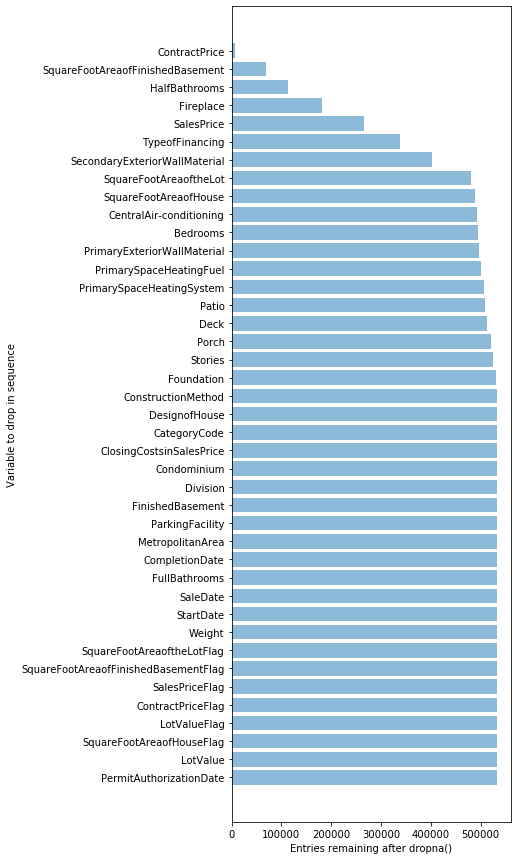

In [13]:
# Trying to drop variables one after the other based on how much of the data remaining will be not NA
tmp_dt = dt.copy()
drop_x = []
drop_y = []
for i in range(len(dt.columns) - 1):
    initial_length = len(tmp_dt)
    sel = {c: len(tmp_dt.drop(columns=[c,]).dropna()) for c in tmp_dt.columns}
    choice = sorted(sel, key=sel.get, reverse=True)[0]
    tmp_dt = tmp_dt.drop(columns=[choice,])
    print(f"Dropping {choice}. Saving {sel[choice]} entries! Size after dropping na = {len(tmp_dt.dropna())}")
    drop_x.append(choice)
    drop_y.append(len(tmp_dt.dropna()))
drop_x.reverse()
drop_y.reverse()
y_pos = np.arange(len(drop_x))
plt.figure(figsize=(5, 15))
plt.barh(
    y_pos, 
    drop_y,
    align='center', 
    alpha=0.5
)
plt.yticks(y_pos, drop_x)
plt.xlabel("Entries remaining after dropna()")
plt.ylabel("Variable to drop in sequence")
plt.show()